# Exploratory data analysis

## Preparation and first ideas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

Let's first get an idea about our data concerning prices of houses in Kings County, USA. Our goal is to figure out which features will possibly help us to make a prediction about the price of a certain house. 

We see that there are 20 features and that there are over 20.000 data points.

In [4]:
df = pd.read_csv('kc_house_prices/King_County_House_prices_dataset.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [13]:
df.shape

(21597, 21)

In [53]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Idea
Looking at the data, we can directly assume that not all features will have the same relevance for our prediction model. For example, we don't expect to lose a lot of information if we simply ignore the latitude and longitude. The zipcode already contains information where a certain house is located.

## Get some information about the target value

So let's see how the prices are distributed. We get the main statistical information via the 'discribe' method.

In [97]:
df['price'].describe().round(2)

count      21597.00
mean      540296.57
std       367368.14
min        78000.00
25%       322000.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

In order to obtain the same information about all the features, we apply this method to the entire DataFrame.

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In order to illustrate the distribution graphically, let's see a histogram and a boxplot.

<AxesSubplot:ylabel='Frequency'>

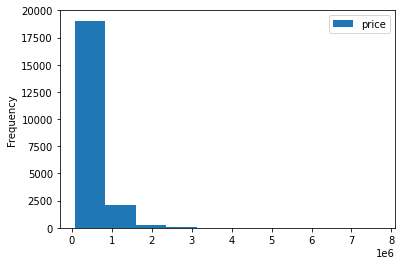

In [20]:
df[['price']].sort_values(by = ['price']).plot(kind='hist')

<AxesSubplot:>

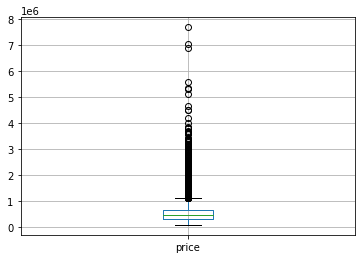

In [21]:
df.boxplot(column=['price'])

We see the median value is about half a million dollars. We also see that the data is strongly skewed.

In [23]:
df[['price']].skew()

price    4.023365
dtype: float64

### Logistic Function

Looking at the log-values of the prices, we find that these values come close to being normally distributed.

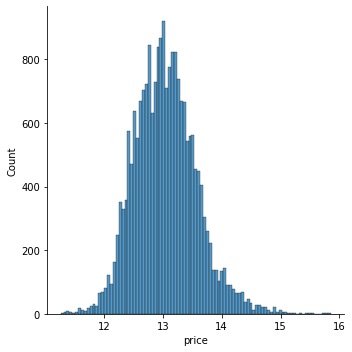

In [7]:
sns.displot(np.log(df['price']))

## Numerical and categorical data

In an EDA we commonly seperate to types of features: Numerical features and categorical features. Both features can determine our target variable - the price. But when it comes to making a mathematical model, the two types need to be treated in different ways.

Let's have a look at the different columns and find out how many different values this feature has in our dataset. For example in the columns waterfront, condition and grade, we only find a rather small number of unique numbers. In general, such a small number can be seen as an indicator that this feature should be treated as categorical. But be aware that there is no strict rule we have to obey to.

In [29]:
for i in df.columns:
    print(i +": " + str(df[i].nunique()))

id: 21420
date: 372
price: 3622
bedrooms: 12
bathrooms: 29
sqft_living: 1034
sqft_lot: 9776
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 11
sqft_above: 942
sqft_basement: 304
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5033
long: 751
sqft_living15: 777
sqft_lot15: 8682


Later in this document, when we run our final model, you find which features will finally be treated as numerical and which ones as categorical.

## Check out some probable correlations
Next step is to take some numeric features and calculate the extent to which they are correlated to the price.

In [23]:
df[['price','sqft_living']].corr()

,price,sqft_living
price,1.000000,0.701917
sqft_living,0.701917,1.000000


As one might have guessed, the sqft_living is quite well correlated to the house price. 

In [29]:
df[['price','sqft_living15']].corr()

,price,sqft_living15
price,1.000000,0.585241
sqft_living15,0.585241,1.000000


In [30]:
df[['price','floors']].corr()

,price,floors
price,1.000000,0.256804
floors,0.256804,1.000000


Finally, let's have a look at the entire correlation matrix. This matrix displays the correlations between all the possible correlations. Looking at the price columns, we quickly see that there are only few features which are strongly correlated with the price.

In [28]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


We conclude that we will need to include several features in our linear regression model in order to obtain a reasonable R^2-Value, the so called coefficient of the determination.

## First linear regression

Let's first draw a best fit through the data points which only contain price and sqft_living. We will see directly that more features are needed.

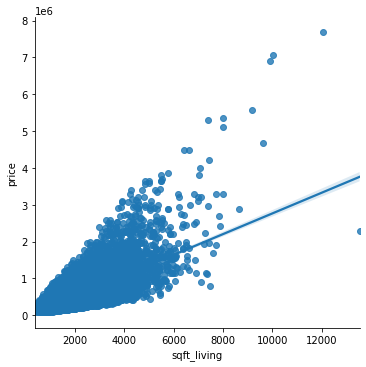

In [8]:
sns.lmplot(x='sqft_living',y='price',data=df);

Let's also have a quick look at the key values of this model:

In [13]:
smf.ols(formula='price ~ sqft_living', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:18:10   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Not very surprisingly, the line is not too well fitted to our data points. 

Now add to more numerical values to the model: Obviously the R^2 value does not in increase significantly if we add more numerical features. The R^2 value is only slightly better than the one we obtained above.

In [15]:
smf.ols(formula='price ~ sqft_living + sqft_above + sqft_living15', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:34:19   Log-Likelihood:            -2.9988e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21593   BIC:                         5.998e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.975e+04   5419.172    -18.407      0.000    -1.1e+05   -8.91e+04
sqft_living     267.8369      4.265     62.798      0.000     259.477     276.197
sqft_above      -37.3141      4.540     -8.219      0.000     -46.213     -28.415
sqft_living15    75.3031      4.037     18.653      0.000      67.390      83.216
==============================================================================
Omnibus:                    15592.381   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           693332.894
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      30.108   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Zipcodes

Maybe the zipcodes will help us to get reliable information about the prices of houses.

In [18]:
df[['zipcode']].nunique()

zipcode    70
dtype: int64

Even though the number of unique values we see in our zipcode-column is rather big compared to the equivalent number we get i.e. in the grade-column, there is no doubt that this feature can only be treated as categorical.

Now let's group our data by the zipcode, then sort all these groups by the mean value of house prices. Have a look at the mean-column in the data set below and the boxplot we displayed. We find that the skew of this data is low compared to the one we got looking at the prices without grouping them by zipcodes. We also see a small number of outliers. We get a similar result if we sort the data by the median-values instead.

         price                                                          \
         count        mean         std       min        25%        50%   
zipcode                                                                  
98002    199.0   234284.04    52041.45   95000.0   199975.0   235000.0   
98168    269.0   240328.37    69984.82   78000.0   199950.0   235000.0   
98032    125.0   251296.24    64705.43   85000.0   221700.0   249000.0   
98001    361.0   281194.87    98837.43  100000.0   215000.0   260000.0   
98148     57.0   284908.60    89616.94  105500.0   240000.0   278000.0   
...        ...         ...         ...       ...        ...        ...   
98102    104.0   899607.67   790381.37  330000.0   571875.0   710000.0   
98112    269.0  1096239.01   594223.18  169317.0   680000.0   915000.0   
98040    282.0  1194873.64   607767.64  500000.0   822000.0   993750.0   
98004    317.0  1356523.99   746094.07  425000.0   845000.0  1150000.0   
98039     50.0  2161300.00  1166904.40

2.600601771175275

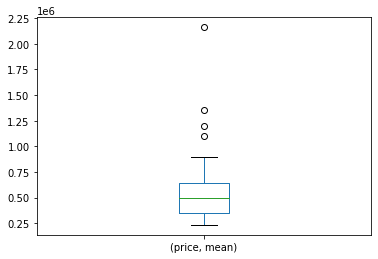

In [52]:
df_new = df[['price','zipcode']]
df_new_2 = df_new.groupby('zipcode').describe().sort_values(by = [('price', 'mean')]).round(2)

print(df_new_2)

b = df_new_2[('price','mean')]

b.plot(kind='box')
print('Skew-Value:')
b.skew()

These findings make us hope for a good increase of the R^2 value by simply adding the zipcodes to our previous model which only depended on the sqft_living value. We see that this is indeed the case: The R^2 value of 0.73 is quite acceptable considering the small amount of features we included.

In [47]:
model = smf.ols(formula="price~ sqft_living + C(zipcode)", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     831.2
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        07:56:36   Log-Likelihood:            -2.9325e+05
No. Observations:               21597   AIC:                         5.866e+05
Df Residuals:                   21526   BIC:                         5.872e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.993e+05   1.05e+04    -18.977      0.000    -2.2e+05   -1.79e+05
C(zipcode)[T.98002]  2.275e+04   1.69e+04      1.347      0.178   -1.03e+04    5.59e+04
C(zipcode)[T.98003]  6582.2750   1.52e+04      0.432      0.666   -2.33e+04    3.64e+04
C(zipcode)[T.98004]  8.216e+05   1.48e+04     55.504      0.000    7.93e+05    8.51e+05
C(zipcode)[T.98005]  3.391e+05   1.79e+04     18.944      0.000    3.04e+05    3.74e+05
C(zipcode)[T.98006]  3.303e+05   1.33e+04     24.818      0.000    3.04e+05    3.56e+05
C(zipcode)[T.98007]  2.658e+05    1.9e+04     13.995      0.000    2.29e+05    3.03e+05
C(zipcode)[T.98008]  3.065e+05   1.52e+04     20.181      0.000    2.77e+05    3.36e+05
C(zipcode)[T.98010]  8.346e+04   2.16e+04      3.862      0.000    4.11e+04    1.26e+05
C(zipcode)[T.98011]   1.21e+05    1.7e+04      7.118      0.000    8.77e+04    1.54e+05
C(zipcode)[T.98014]  1.204e+05   1.99e+04      6.047      0.000    8.13e+04    1.59e+05
C(zipcode)[T.98019]  7.604e+04   1.71e+04      4.436      0.000    4.24e+04     1.1e+05
C(zipcode)[T.98022]  5.232e+04   1.61e+04      3.256      0.001    2.08e+04    8.38e+04
C(zipcode)[T.98023] -1.614e+04   1.32e+04     -1.222      0.222    -4.2e+04    9755.628
C(zipcode)[T.98024]   1.89e+05   2.36e+04      7.996      0.000    1.43e+05    2.35e+05
C(zipcode)[T.98027]  1.817e+05   1.38e+04     13.149      0.000    1.55e+05    2.09e+05
C(zipcode)[T.98028]   1.26e+05   1.52e+04      8.300      0.000    9.63e+04    1.56e+05
C(zipcode)[T.98029]  2.354e+05   1.47e+04     16.036      0.000    2.07e+05    2.64e+05
C(zipcode)[T.98030]   174.7060   1.56e+04      0.011      0.991   -3.05e+04    3.08e+04
C(zipcode)[T.98031]  1.261e+04   1.53e+04      0.822      0.411   -1.75e+04    4.27e+04
C(zipcode)[T.98032]  1.193e+04   1.98e+04      0.601      0.548    -2.7e+04    5.08e+04
C(zipcode)[T.98033]  4.023e+05   1.37e+04     29.457      0.000    3.76e+05    4.29e+05
C(zipcode)[T.98034]  2.216e+05    1.3e+04     17.081      0.000    1.96e+05    2.47e+05
C(zipcode)[T.98038]  2.419e+04   1.28e+04      1.892      0.059    -873.800    4.93e+04
C(zipcode)[T.98039]  1.401e+06    2.9e+04     48.308      0.000    1.34e+06    1.46e+06
C(zipcode)[T.98040]  6.101e+05   1.53e+04     39.836      0.000     5.8e+05     6.4e+05
C(zipcode)[T.98042]  1.072e+04    1.3e+04      0.827      0.408   -1.47e+04    3.61e+04
C(zipcode)[T.98045]   1.17e+05   1.64e+04      7.151      0.000    8.49e+04    1.49e+05
C(zipcode)[T.98052]   2.48e+05   1.29e+04     19.276      0.000    2.23e+05    2.73e+05
C(zipcode)[T.98053]  2.152e+05   1.39e+04     15.479      0.000    1.88e+05    2.42e+05
C(zipcode)[T.98055]  5.313e+04   1.54e+04      3.446      0.001    2.29e+04    8.34e+04
C(zipcode)[T.98056]  1.111e+05   1.38e+04      8.031      0.000     8.4e+04    1.38e+05
C(z

## Combining numerical and categorical features in a final linear regression model

Now we'll generate a final linear regression model which we find is best suitable to predict house prices. It's a model containing quite a lot of features. The R^2 value we obtain is 0.857, which is not far below the value we would have got if we had included all the features which are available. 

Indeed, there are some advantages we get by ignoring some features which compensate the loss of determination. For example the features waterfront and yr_renovated contain a lot of NaN values. By including these columns in our model we get quite a big decrease of data points to adapt our model to. On the other hand, these features only contribute to a small extent to our R^2 value. So ignoring these features seems to be the better option. 

In [57]:
cols = ["date", 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built',  'zipcode', 
       'sqft_living15', 'sqft_lot15']
cats = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade" ,"zipcode"]

s=""
for c in cols:
    if c not in cats and c != "price":
        s += c +"+"
    else:
        if c != "price":
            s+= "C({:})+".format(c)
s=s[:-1]
print(s)

model = smf.ols(formula="price~"+s, data=df).fit()
results = model.summary()
results

date+C(bedrooms)+C(bathrooms)+sqft_living+sqft_lot+C(floors)+C(view)+C(condition)+C(grade)+sqft_above+sqft_basement+yr_built+C(zipcode)+sqft_living15+sqft_lot15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:17:50   Log-Likelihood:            -2.8546e+05
No. Observations:               21534   AIC:                         5.725e+05
Df Residuals:                   20727   BIC:                         5.790e+05
Df Model:                         806                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.191e+05   2.45e+05      3.341      0.001    3.39e+05     1.3e+06
date[T.1/12/2015]        8009.5996   1.43e+05      0.056      0.955   -2.72e+05    2.88e+05
date[T.1/13/2015]        2.016e+04   1.43e+05      0.141      0.888    -2.6e+05       3e+05
date[T.1/14/2015]        1794.8388   1.43e+05      0.013      0.990   -2.78e+05    2.81e+05
date[T.1/15/2015]         1.24e+04   1.43e+05      0.087      0.931   -2.68e+05    2.92e+05
date[T.1/16/2015]       -3.794e+04   1.43e+05     -0.266      0.790   -3.17e+05    2.41e+05
date[T.1/17/2015]        5.443e+04      2e+05      0.272      0.785   -3.37e+05    4.46e+05
date[T.1/19/2015]       -3.501e+04    1.5e+05     -0.234      0.815   -3.29e+05    2.59e+05
date[T.1/2/2015]         2.628e+04   1.43e+05      0.184      0.854   -2.54e+05    3.06e+05
date[T.1/20/2015]        3.397e+04   1.43e+05      0.238      0.812   -2.46e+05    3.14e+05
date[T.1/21/2015]        2.062e+04   1.42e+05      0.145      0.885   -2.59e+05       3e+05
date[T.1/22/2015]        6087.7646   1.43e+05      0.043      0.966   -2.74e+05    2.86e+05
date[T.1/23/2015]       -1.718e+04   1.43e+05     -0.120      0.904   -2.97e+05    2.62e+05
date[T.1/24/2015]       -1.268e+05   1.58e+05     -0.802      0.423   -4.37e+05    1.83e+05
date[T.1/25/2015]        3.367e+04   1.63e+05      0.206      0.837   -2.86e+05    3.53e+05
date[T.1/26/2015]       -4.945e+04   1.43e+05     -0.347      0.729   -3.29e+05     2.3e+05
date[T.1/27/2015]        2.944e+04   1.42e+05      0.207      0.836    -2.5e+05    3.09e+05
date[T.1/28/2015]        1.208e+04   1.42e+05      0.085      0.932   -2.67e+05    2.91e+05
date[T.1/29/2015]        2.805e+04   1.43e+05      0.196      0.844   -2.52e+05    3.08e+05
date[T.1/30/2015]        4.756e+04   1.43e+05      0.332      0.740   -2.33e+05    3.28e+05
date[T.1/31/2015]        4.416e+04      2e+05      0.221      0.825   -3.47e+05    4.36e+05
date[T.1/5/2015]         1.479e+04   1.42e+05      0.104      0.917   -2.64e+05    2.94e+05
date[T.1/6/2015]          2.09e+04   1.43e+05      0.146      0.884   -2.59e+05    3.01e+05
date[T.1/7/2015]         5.311e+04   1.43e+05      0.373      0.709   -2.26e+05    3.32e+05
date[T.1/8/2015]        -1.703e+04   1.43e+05     -0.119      0.905   -2.97e+05    2.63e+05
date[T.1/9/2015]         5.835e+04   1.43e+05      0.408      0.684   -2.22e+05    3.39e+05
date[T.10/1/2014]        2.182e+04   1.42e+05      0.154      0.878   -2.57e+05       3e+05
date[T.10/10/2014]        569.5611   1.42e+05      0.004      0.997   -2.78e+05    2.79e+05
date[T.10/11/2014]       3.507e+05   1.79e+05      1.964      0.050     633.062    7.01e+05
date[T.10/12/2014]       4.211e+04   1.63e+05      0.258      0.796   -2.78e+05    3.62e+05
date[T.10/13/2014]      -9732.0225   1.42e+05  

We see that the list of coefficients we get here is quite long.

## Save Data with pickle

Finally, we need to save all the coefficients displayed above in order to make a prediction in a separate file. We'll use the Python module pickle.

In [ ]:
import pickle

l = model.params.to_list()
i = model.params.index.to_list()
pickleData = [(m,n) for m,n in zip(i,l)]

fh = open("data_params.pkl","wb")
pickle.dump(pickleData,fh)
fh.close()